# Modi's Independence Day Speech Wordcloud Analysis

<center>
<img src="mask.png" width="500px"/>
</center>

---

In [9]:
import numpy as np 
from PIL import Image,ImageOps 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator 
from scipy.ndimage import gaussian_gradient_magnitude 
from skimage.filters import gaussian

In [10]:
file=open("speech.txt",'r') 
text=file.read()

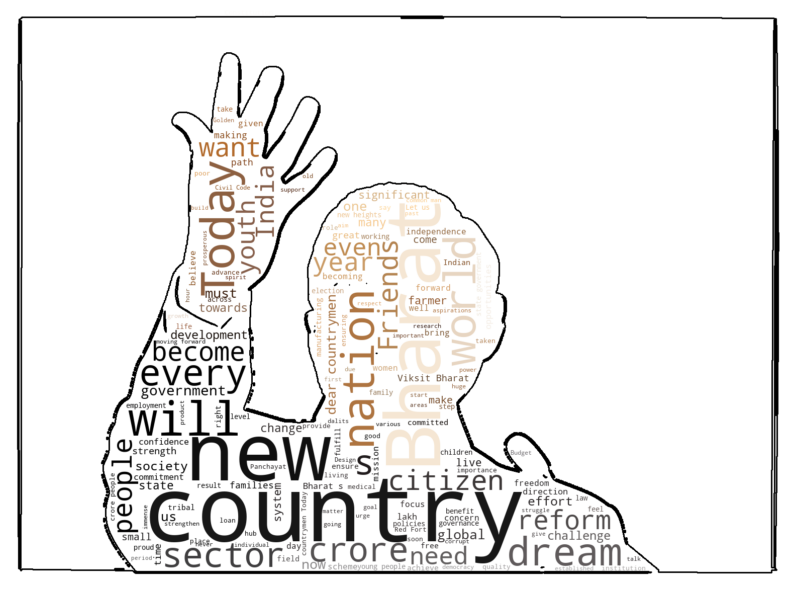

In [4]:
image = np.array(Image.open("mask.png"))
image_mask = image.copy()
image[image_mask.sum(axis=2) == 0] = 255

edges = np.mean([gaussian_gradient_magnitude(image[:, :, i] / 255., 2) for i in range(3)], axis=0)

image_mask[edges > 0.1] = 255

wc = WordCloud(background_color='white', mask=image_mask, contour_width=3, contour_color='black')

wc.generate(text)

image_colors = ImageColorGenerator(image)
wc.recolor(color_func=image_colors)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Save the WordCloud to a file
wc.to_file("output.png")

Made by [HDz](https://github.com/hdz-088/)

---